In [1]:
import pandas as pd 
hdata = pd.read_csv('hdata.csv')
print(hdata.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [2]:
from sklearn.model_selection  import train_test_split
train_set , test_set = train_test_split(hdata , test_size=0.2, random_state=42)
print(f"rows in train_set: {(len(train_set))}\n row in test_set: {(len(test_set))}")

rows in train_set: 331
 row in test_set: 83


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2 , random_state= 42)
for train_index , test_index in split.split(hdata , hdata['X4 number of convenience stores']):
    strat_train_set = hdata.loc[train_index]
    strat_test_set = hdata.loc[test_index]

In [4]:
# strat_test_set.describe()
# strat_test_set.info()
strat_test_set
# strat_train_set

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
119,120,2013.500,16.6,289.32480,5,24.98203,121.54348,59.6
80,81,2013.500,11.8,533.47620,4,24.97445,121.54765,40.3
89,90,2013.500,23.0,3947.94500,0,24.94783,121.50243,25.3
359,360,2013.500,5.6,2408.99300,0,24.95505,121.55964,24.7
63,64,2013.583,2.6,533.47620,4,24.97445,121.54765,55.0
...,...,...,...,...,...,...,...,...
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
226,227,2013.000,16.5,4082.01500,0,24.94155,121.50381,12.8
164,165,2012.833,0.0,185.42960,0,24.97110,121.53170,55.2
326,327,2013.500,4.1,56.47425,7,24.95744,121.53711,62.1


In [5]:
corr_matrix = hdata.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending = False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>]],
      dtype=object)

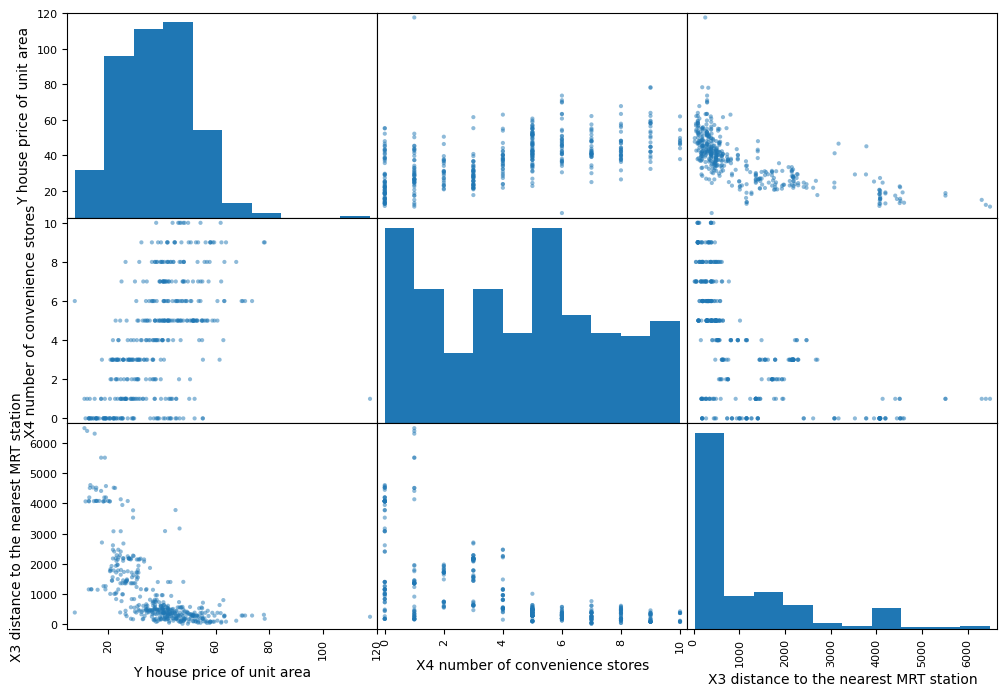

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area", "X4 number of convenience stores","X3 distance to the nearest MRT station"]
scatter_matrix(hdata[attributes],figsize = (12,8))

<Axes: xlabel='X4 number of convenience stores', ylabel='X6 longitude'>

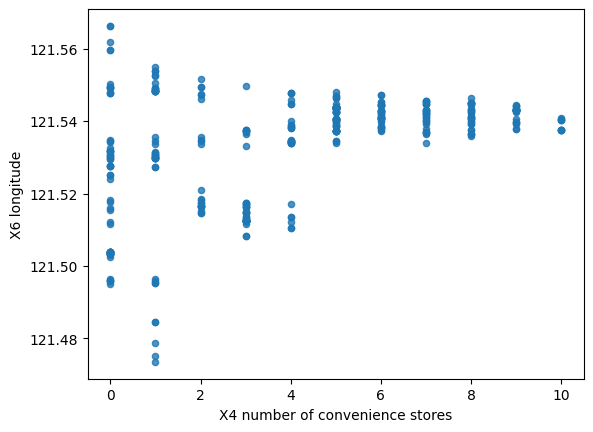

In [7]:
hdata.plot(kind = "scatter",x="X4 number of convenience stores",y = "X6 longitude", alpha= 0.8) 

In [8]:
# seprating lable or feature from data

In [9]:
hdata = strat_train_set.drop("X3 distance to the nearest MRT station",axis=1)
hdata_labels = strat_train_set["X3 distance to the nearest MRT station"].copy()

trying  attibute combination

In [10]:
# hdata["storestation"] = hdata['X4 number of convenience stores']/hdata['X3 distance to the nearest MRT station']
# hdata.head()

In [11]:
corr_matrix = hdata.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending = False)

Y house price of unit area         1.000000
X4 number of convenience stores    0.636209
X5 latitude                        0.569626
X6 longitude                       0.535064
X1 transaction date                0.054334
No                                -0.022784
X2 house age                      -0.182001
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='X4 number of convenience stores', ylabel='X6 longitude'>

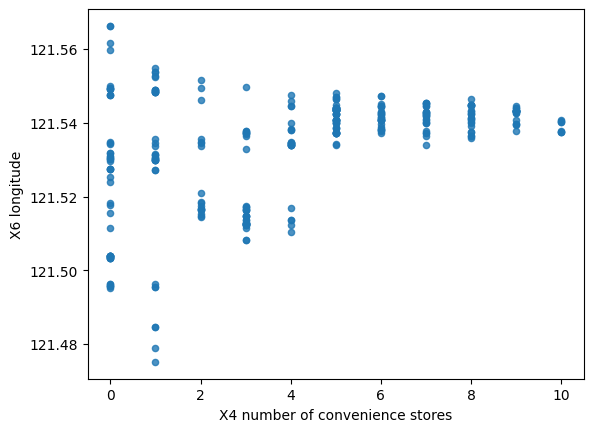

In [12]:
hdata.plot(kind = "scatter",x="X4 number of convenience stores",y = "X6 longitude", alpha= 0.8) 

In [13]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 369 to 292
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               331 non-null    int64  
 1   X1 transaction date              331 non-null    float64
 2   X2 house age                     331 non-null    float64
 3   X4 number of convenience stores  331 non-null    int64  
 4   X5 latitude                      331 non-null    float64
 5   X6 longitude                     331 non-null    float64
 6   Y house price of unit area       331 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 20.7 KB


In [14]:
hdata.describe() # before started filling missing value

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,4.102719,24.969250,121.533541,37.623565
std,120.383667,0.280728,11.497031,2.944182,0.012326,0.015267,12.960756
min,1.000000,2012.667000,0.000000,0.000000,24.933630,121.475160,7.600000
25%,103.500000,2012.917000,9.100000,1.000000,24.963050,121.529675,27.300000
50%,209.000000,2013.167000,16.100000,4.000000,24.971100,121.538440,38.300000
75%,311.500000,2013.417000,29.600000,6.000000,24.978045,121.543395,46.150000
max,414.000000,2013.583000,43.800000,10.000000,25.014590,121.566270,78.300000


# to get missing atributes in data 

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(hdata)
imputer.statistics_

array([ 209.     , 2013.167  ,   16.1    ,    4.     ,   24.9711 ,
        121.53844,   38.3    ])

In [16]:
x = imputer.transform(hdata)
hdata_tr = pd.DataFrame(x , columns = hdata.columns)
hdata_tr.describe()

# hare data will remain same brcouse there no  deleated  atributes from data set . there no missimg values in data set

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,4.102719,24.969250,121.533541,37.623565
std,120.383667,0.280728,11.497031,2.944182,0.012326,0.015267,12.960756
min,1.000000,2012.667000,0.000000,0.000000,24.933630,121.475160,7.600000
25%,103.500000,2012.917000,9.100000,1.000000,24.963050,121.529675,27.300000
50%,209.000000,2013.167000,16.100000,4.000000,24.971100,121.538440,38.300000
75%,311.500000,2013.417000,29.600000,6.000000,24.978045,121.543395,46.150000
max,414.000000,2013.583000,43.800000,10.000000,25.014590,121.566270,78.300000


sklearn designe

# there are three objects are present in sklearn 
1 estimater = it estimate some parameter based on a dataset. eg imputer
it has a fit method and transform method.
fit method - fits the datasets and calculate internal parameter 

2 transformers - taansforme method takes input and return output based on 
the learning from fit(). it also has  a convenience functiion callled fit_transform()
which fits and then transforms.

3 predictors - LinearRegression model is an example of predictor. fit() 
and predict() are two common function. it also gives score function which will
evaluate the predictions.

## featue scalling 
primarily , two type of feature scalling methods 
1 Min-max scalling (Normalisation)
  (value - min)/max-min)
sklearn provides  a class called MinMaxScaller for this 

2 standaredisation 
  (value - mean)/std
   sllearn provides a class called standared scaller for this 

Creating a Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer ' , SimpleImputer(strategy = 'median')),
    # .... add as many as you want in your pipeline 
    ('std_scaler' , StandardScaler()),
])

In [18]:
# hdata_num_tr = my_pipeline.fit_transform(hdata_tr) #for transform or fitted data 
hdata_num_tr = my_pipeline.fit_transform(hdata) # for original data 
# hdata_num_tr.shape
hdata_num_tr

array([[ 1.33634919, -1.69732575,  0.18998546, ..., -0.48993566,
        -1.38876478, -1.14545847],
       [ 1.26147503, -1.69732575,  1.29629087, ...,  1.11723968,
         0.43815207,  0.73227073],
       [-0.23600818, -1.69732575,  0.7736269 , ..., -1.64697191,
        -2.44883575, -1.70954996],
       ...,
       [-0.41071455, -1.69732575, -0.21943465, ...,  0.78085414,
         0.07211271, -0.01727549],
       [-0.56046288,  0.67866516, -1.12538554, ...,  0.23402451,
        -1.13293083, -0.67409435],
       [ 0.69575915, -0.21322332, -0.04521333, ..., -1.01645216,
         0.03012971, -1.0140947 ]])

## slecting desired ML model for house predictions

In [19]:
from sklearn.ensemble  import RandomForestRegressor
model = RandomForestRegressor()
model.fit(hdata_num_tr , hdata_labels)

RandomForestRegressor()

In [20]:
some_data = hdata.iloc[:5]
some_labels = hdata_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

[2185.128, 87.30222, 4449.27, 190.0392, 289.3248]

## evaluating the model

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
hdata_predictions = model.predict(hdata_num_tr)
mse = mean_squared_error(hdata_labels , hdata_predictions)
rmse = np.sqrt(mse)
mse

np.float64(3854.6108821517255)

# useing batter evaluation teshnique  - cress validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,hdata_num_tr , hdata_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [23]:
rmse_scores

array([ 85.40299309, 365.38398387,  67.59064325, 187.65399805,
       128.8891932 , 236.14337148,  99.92189103, 112.52403101,
       160.09949089, 121.06151711])

In [24]:
def print_scores(scores):
    print('scores' ,scores)
    print("Mean" , scores.mean())
    print("standares deviation:" , scores.std())
    

In [25]:
print_scores(rmse_scores)

scores [ 85.40299309 365.38398387  67.59064325 187.65399805 128.8891932
 236.14337148  99.92189103 112.52403101 160.09949089 121.06151711]
Mean 156.46711129762264
standares deviation: 84.30419416777798
